## Apply warp_polar to nD images
Transform an image with n dimensions into polar coordinates.

$$ image\_polar(t, z, \phi, \rho) = process\_higher\_dimension(warp\_polar, image(t, z, y, x)) $$

In [1]:
from biapol_utilities.utilities import process_higher_dimension
from biapol_utilities.data import hourglass
from skimage.morphology import disk
from skimage.transform import warp_polar
import numpy as np
import napari
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2, suppress=True)

### Create synthetic 3D data (z, x, y)
Hollow cylinder

In [3]:
height = 3
radius = 3
filled_disk = disk(radius)
shape = (height, filled_disk.shape[0], filled_disk.shape[1])
filled_disk_in = np.zeros_like(filled_disk)
filled_disk_in[1:-1, 1:-1] = disk(radius - 1)
hollow_disk = filled_disk - filled_disk_in
cylinder = np.broadcast_to(hollow_disk, shape).astype(int)

Plot and print data:

[[[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]]


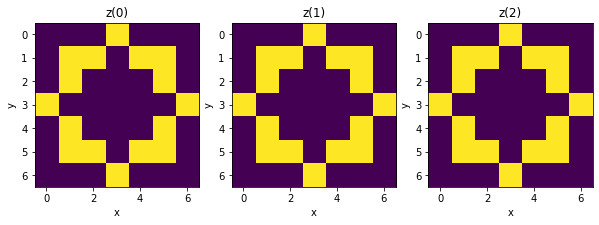

In [4]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    ax[i].imshow(cylinder[i])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
print(cylinder)

### Compare function _process_higher_dimension_ with iterating over z

Transform it into (z, angle, radius) and plot every 45°:

Iterate over z:

In [5]:
radius = 5
new_shape = [cylinder.shape[0], 360, radius]
cylinder_polar = np.zeros(new_shape)
cylinder_polar = np.asarray([warp_polar(cylinder[z], radius = radius) for z in range(cylinder.shape[0])])

Function process_higher_dimension:

In [6]:
cylinder_polar2 = process_higher_dimension(cylinder, warp_polar, radius = radius)

Plot and print results:

[[[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]

 [[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]

 [[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]]


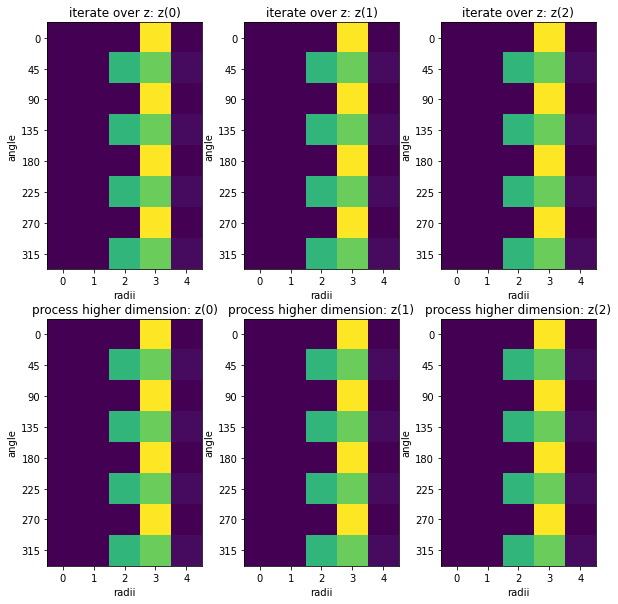

In [7]:
fig, ax = plt.subplots(2,3,figsize=[10,10])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        title = 'z(' + str(j) + ')'
        if i==0:
            title = 'iterate over z: ' + title
            ax[i,j].imshow(cylinder_polar[i,::45,:])
        else:
            title = 'process higher dimension: ' + title
            ax[i,j].imshow(cylinder_polar2[i].compute()[::45])
        ax[i,j].set_xlabel('radii')
        ax[i,j].set_ylabel('angle')
        ax[i,j].set_yticklabels([0,0,45,90,135,180,225,270,315,360])
        ax[i,j].set_title(title)
print(cylinder_polar[:,::45,:]/cylinder_polar.max())

### Load synthetic 4D data (time, z, y, x)

Visualize it with napari. Data depicts a 3D hourglass with a half ring droplet that falls over time.

In [8]:
image = hourglass()
viewer = napari.Viewer()
viewer.add_image(image)

<Image layer 'image' at 0x27427c4fe50>

Get screenshots from napari viewer:

In [33]:
screenshot_image = viewer.screenshot()

### Apply skimage.warp_polar to 4D data using _process_higher_dimension_

Transform it into (time, z, angle, radius):

In [9]:
image_polar = process_higher_dimension(image, warp_polar)

In [10]:
viewer = napari.Viewer()
viewer.add_image(image_polar)

<Image layer 'image_polar' at 0x2748eba6fb0>

Get screenshots from napari viewer:

In [36]:
screenshot_image_polar = viewer.screenshot()

 Display image (x | y , z) view and polar image (radius | angle , z) view:

[]

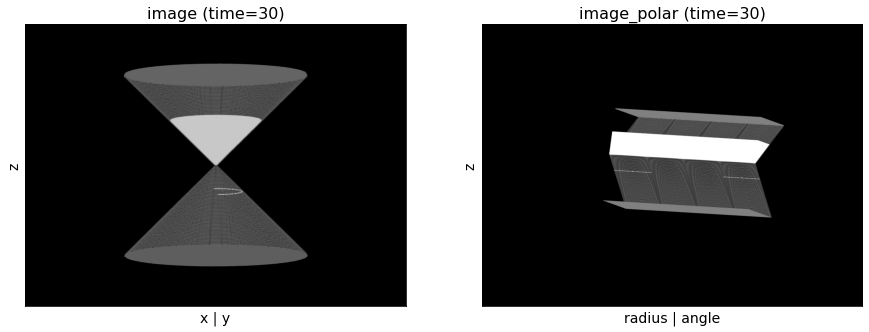

In [40]:
fig, ax = plt.subplots(1,2,figsize=[15,15])
ax[0].imshow(screenshot_image)
ax[0].set_xlabel('x | y', size=14)
ax[0].set_ylabel('z', size=14)
ax[0].set_title('image (time=30)', size=16)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].imshow(screenshot_image_polar)
ax[1].set_xlabel('radius | angle', size=14)
ax[1].set_ylabel('z', size=14)
ax[1].set_title('image_polar (time=30)', size=16)
ax[1].set_yticks([])
ax[1].set_xticks([])

### Get cylinder projection
Transform it into (time, z, angle) and plot one time point (time=30):

In [11]:
cylinder_projection = image_polar.max(axis=-1)

Text(0.5, 1.0, 'time = 30')

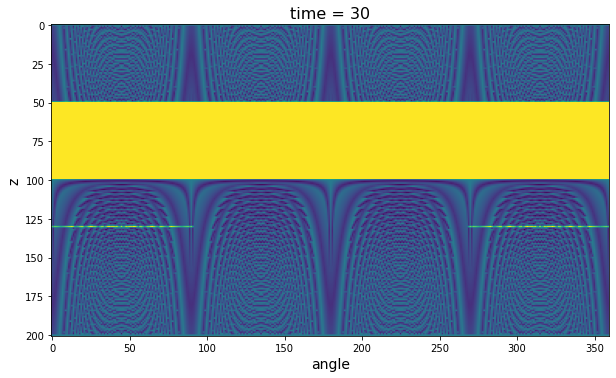

In [12]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(cylinder_projection[30])
ax.set_xlabel('angle', size=14)
ax.set_ylabel('z', size=14)
ax.set_title('time = 30', size=16)

### Time of execution

Function _process_higher_dimension_:

In [15]:
%%timeit -n 5 -r 4
cylinder_polar = process_higher_dimension(image, warp_polar)

17.8 ms ± 1.53 ms per loop (mean ± std. dev. of 4 runs, 5 loops each)


Iteration over t and z:

$\color{red}{\text{Warning!!! Executing cell below may take a very long time!}}$

In [14]:
%%timeit -n 1 -r 1
new_shape = [image.shape[0], image.shape[1], 360, min(image.shape[-2], image.shape[-1])]
cylinder_polar = np.zeros(new_shape)
cylinder_polar = np.asarray([[warp_polar(image[t, z])
                              for z in range(image.shape[1])]
                             for t in range(image.shape[0])])

1min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Size

Iterate over time and z (_numpy_array_):

$\color{red}{\text{Warning!!! Executing cell below may take a very long time!}}$

In [16]:
new_shape = [image.shape[0], image.shape[1], 360, min(image.shape[-2], image.shape[-1])]
cylinder_polar = np.zeros(new_shape)
cylinder_polar = np.asarray([[warp_polar(image[t, z])
                              for z in range(image.shape[1])]
                             for t in range(image.shape[0])])

In [17]:
props = {'Bytes' : str(cylinder_polar.nbytes/1e+6) + ' MB', 'Shape' : str(cylinder_polar.shape), 'Type' : str(type(cylinder_polar))}
pd.DataFrame.from_dict(props, orient='index', columns=['Array'])

,Array
Bytes,8277.984 MB
Shape,"(100, 201, 360, 143)"
Type,<class 'numpy.ndarray'>


process_higher_dimensions (_dask_array_):

In [18]:
process_higher_dimension(image, warp_polar)

,Array,Chunk
Bytes,774.44 MiB,7.74 MiB
Shape,"(100, 201, 201, 201)","(1, 201, 201, 201)"
Count,400 Tasks,100 Chunks
Type,uint8,numpy.ndarray
